# Einführung in Jupyter Notebook und Python

In [ ]:
# Diesen Teil machen wir gemeinsam

# Gebe den String "Hello World!" aus
print("Hello World!")

# Ordne einer Variable den String "FTP1-Praktikum" zu und gebe den String aus
text = "FTP1-Praktikum"
print(text)

# Ordne der Variable x den Wert 2 sowie y = 5 zu und addiere 7
x = 2
y = 5
z = x + y + 7
print(z)

# Schreibe eine Funktion, mit der die Quadratzahl einer Zahl berechnet werden kann
def square(a):
    x = a * a
    return x
print(square(2))

# Gebe die Quadratzahlen von 1 bis 5 aus
for x in range(1, 6):
    print(square(x))

# Gebe die Quadratzahlen von 1 bis 5 aus, falls die Zahl größer 3 ist
for i in range(1, 6):
    if i > 3:
        print(square(i))

Hello World!
FTP1-Praktikum
14
4
1
4
9
16
25
16
25


# Einführung in Machine Learning mit Schraub-Zeitreihen-Klassifizierung

Dieses Projekt wird dir das prinzipielle Vorgehen von Machine Learning Methoden am praktischen Code erläutert. Dabei werden die Schritte Datenimport, Datenvisualisierung, Datenaufbereitung, Modellaufbau mit Keras, Training und Auswertung durchgeführt. Jeder dieser Schritte ist in unterschiedliche Abschnitte aufgeteilt, die einzeln ausgeführt werden können NACHDEM die vorherigen Schritte durchgeführt wurden.
Für jeden Schritt erfolgt zunächt eine Demonstration, die das prinzipielle Vorgehen erläutert. Anschließend folgt eine Aufgabe, die der Student selbstständig durchführen soll. Diese Einführung ist sowohl für Programmier- als auch Machine-Learning-Anfänger geeignet.



## Imports
Am Anfang einer Datei stehen die importierten Packages und verwendeten Funktionen. In diesem Beispiel sind kurze Beschreibungen der einzelnen Packages als Kommentare eingefügt

In [ ]:
# imports
# pandas und numpy sind sehr verbreitete Python packages zum Datenimport, -aufbereitung und -export
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  # pyplot ist vor allem für Visualisierungen

# keras ist ein framework zum Entwickeln von Neuronalen Netzen, ähnlich wie pytorch, tensorflow, etc.
# das relativ einfach zu bedienen ist
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.models import load_model
from keras.utils.np_utils import to_categorical

# sklearn bietet eine Sammlung von machine learning Algorithmen,
# sowie nützlichen Funktionen zur Datenaufbereitung und Auswertung
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score

from datetime import datetime

## 1. Importiere die Daten aus Ordnern auf dem PC

### Einleitung
Im ersten Schritt wollen wir uns die Daten, welche wir analysieren wollen, anschauen. Die Daten liegen unter "C:/Data/Einführung/" ab. Öffnet die erste Datei und gebt an, wie die Vorgänge in den Dateien abgespeichert sind.

Wir wollen Daten von drei Ordnern importieren, die alle auf dem Pfad "C:/FTP1_V06/Einführung/" liegen.
Die drei Ordner heißen 1, 2 und 3.
In jedem Ordner sind eine unterschiedliche Anzahl Dateien, deren Name "ast11-graph (x).csv"" lautet, wobei x eine zahl von 1-100 ist.
In jeder Datei sind die Parameter eines kompletten Schraubvorgangs gespeichert.
Die csv Dateien speichern Werte, indem sie durch Kommata getrennt werden (Comma Seperated Values).

Die Aufgabe in diesem Abschnitt ist es, alle Dateien einzulesen und in einem gemeinsamen Array zu speichern.

Das allgemeine Vorgehen wird dabei zunächst beispielhaft am Ordner 1 demonstriert, die folgenden Abschnitte zum Import sollen danach selbstständig ausgeführt werden

### Demonstration

In [ ]:
# Diesen Teil machen wir gemeinsam

# der Pfad vom ersten Ordner
mypath = "C:/FTP1_V06/Einführung/1/"

# zwei Beispieldateien, die wir uns vorab anschauen wollen
filename1 = mypath + "ast11-graph (1).csv"
filename2 = mypath + "ast11-graph (73).csv"

# die pandas(pd) Funktion "read_csv" liest csv dateien in das eigene Pandasformat DataFrame ein
# encoding = "ISO-8859-1" erklärt der Funktion wie die Zeichen interpretiert werden sollen und ist die bei uns übliche Einstellung
# wir können uns die einzelnen DataFrames direkt mit print in der Console (teilweise) anzeigen lassen
df1 = pd.read_csv(filename1, encoding = "ISO-8859-1")
print("Dataframe1:")
print(df1)
df2 = pd.read_csv(filename2, encoding = "ISO-8859-1")
print("Dataframe 2")
print(df2)

Dataframe1:
       time(0.001 ms)  Speed(RPM)  Torque(N·m)  Angle(°)  Program step  \
0                   0           0      0.03584         0             1   
1                 175           0      0.03584         0             1   
2                 350           0      0.03584         0             1   
3                 525           0      0.03584         0             1   
4                 700           0      0.03584         0             1   
...               ...         ...          ...       ...           ...   
13596         2379300           0      0.00000      3102             1   
13597         2379475           0      0.00000      3102             1   
13598         2379650           0      0.00000      3102             1   
13599         2379825           0      0.00000      3102             1   
13600         2380000           0      0.00000      3102             1   

       Current(A)  Temperature(°C)  
0          -0.023             44.8  
1          -0.026        

Wir sehen, dass die Dateien 7 Spalten (time, speed, torque, angle, program step, current temperature) besitzen und ca. 10000-13000 Zeilen.

Nun wollen wir uns eine Grafik vom Zeitverlauf des Drehmoments ausgeben lassen, um ein besseres Gefühl für die Daten und eventuell auftretende Fehler zu bekommen.

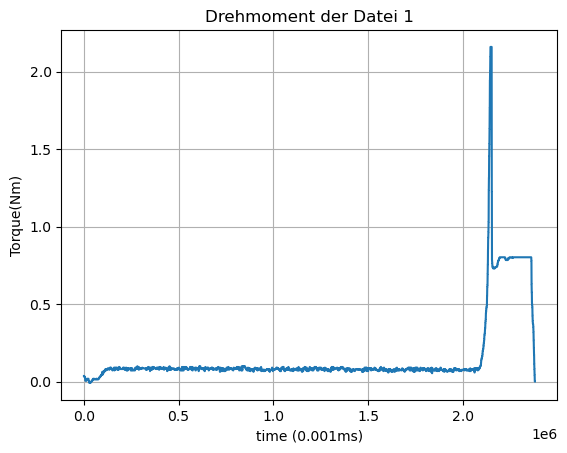

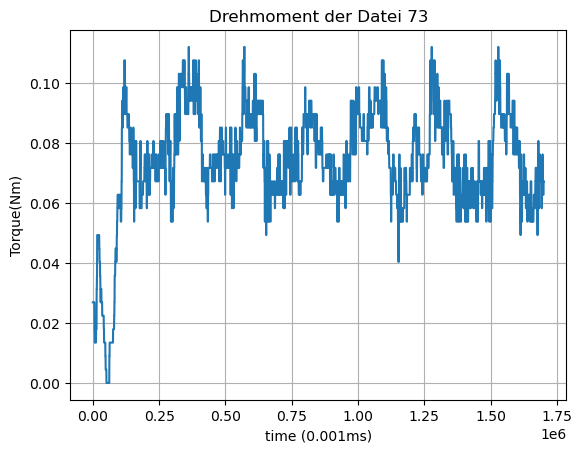

In [ ]:
# Diesen Teil machen wir gemeinsam

# in pandas können einzelne Spalten anhand ihres Namens sehr einfach herauskopiert werden
# wir ziehen uns jetzt die Zeit und das Drehmoment für die beiden Dateien getrennt:
time1 = df1["time(0.001 ms)"]
torque1 = df1["Torque(N·m)"]
time2 = df2["time(0.001 ms)"]
torque2 = df2["Torque(N·m)"]


# weil wir uns potentiell noch öfter Zeitverläufe anschauen wollen,
# definieren wir eine Funktion, die das zukünftig in einer Zeile macht.
# Außerdem können wir dann später alle Grafiken gleichzeitig ändern:
def line_plot(x, y, strTitle):
    """ Stellt eine Zeitreihe als Grafik dar
    x: sind die Werte, die auf der x-Achse dargestellt werden
    y: entsprechend die y-Achse
    strTitle: String, der den Titel angibt"""
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set(xlabel="time (0.001ms)", ylabel="Torque(Nm)", title=strTitle)
    ax.grid()
    plt.show()

# jetzt schauen wir uns die Drehmomente mal an:
line_plot(time1, torque1, "Drehmoment der Datei 1")
line_plot(time2, torque2, "Drehmoment der Datei 73")

### OH NEIN!!!
Es sieht so aus, als ob beim zweiten Schraubvorgang etwas schief gelaufen wäre.
Fehlerhafte Daten wollen wir natürlich nicht importieren, denn mit schlechten Daten kann das Modell später natürlich auch nur schlecht lernen.

Leider gab es kein eindeutiges Merkmal, um die fehlerhaften von den guten Daten zu unterscheiden. Deshalb musste sich der fleißige Student Tim die Grafiken von allen Drehmomentsverläufen anschauen.
Er hat herausgefunden, dass im ersten Ordner die Schraubvorgänge 73, 77, 79, 14, 80, 70, 87, 82, 98,
6, 27, 92, 91, 81, 65, 97, also insgesamt 16, Datensätze unvollständig sind. Alle anderen wollen wir jetzt importieren.

84


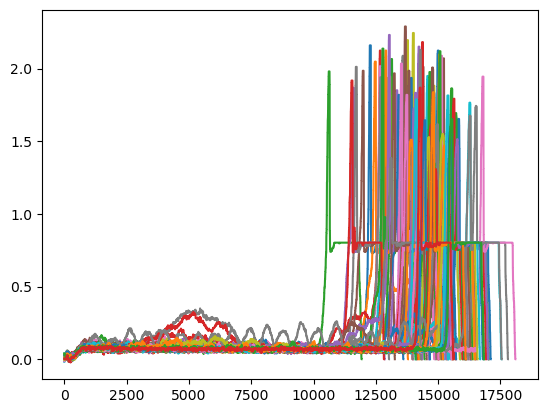

In [ ]:
# Diesen Teil machen wir gemeinsam

# die Nummern von den fehlerhaften Vorgängen speichern wir in einer Liste
lst_dont_import = [73, 77, 79, 14, 80, 70, 87, 82, 98, 6, 27, 92, 91, 81, 65, 97]

# leere Liste, in der wir die zu importierenden Ordner speichern
lst_folder1 = []

# für jede der 100 Dateien, machen wir das 1x:
for i in range(1, 101):
    # wenn i NICHT Teil der Liste lst_dont_import ist, ist die Datei gut und kann importiert werden
    if i not in lst_dont_import:
        # der Name der Datei setzt sich wie vorhin aus dem Ordner mypath, dem Namen und dem Index zusammen
        tmp_filename = mypath + "ast11-graph (" + str(i) + ").csv"
        tmp_df = pd.read_csv(tmp_filename, encoding = "ISO-8859-1")

        # mit .values wird das DataFrame in eine Liste transformiert
        # und mit .append danach ans Ende der Liste gehängt
        lst_folder1.append(tmp_df["Torque(N·m)"].values)


# Nun lassen wir uns zur Kontrolle die Anzahl guter Kurven ausgeben
print(lst_folder1.append(tmp_df["Torque(N·m)"].values))
print(len(lst_folder1))

# Dann plotten wir uns noch die guten Kurven in einem gemeinsamen Plot
for i in range(0, len(lst_folder1)):
    plt.plot(lst_folder1[i])

## Aufgaben:
### Aufgabe 1.1: Importiere die Daten aus den anderen Ordnern 2 und 3.

Im Ordner 2 gibt es keine fehlerhaften Messungen.

Im Ordner 3 haben die fehlerhaften Messungen die Indices: 19, 3, 15, 18, 12, 33. Außerdem gibt es im Ordner 3 nur 50 Messungen.

Hänge die importierten Zeitreihen an eine neue Liste lst_folder23 an. Am Ende sollte der Befehl print(len(lst_folder23)) den Wert 144 zurückgeben. Wenn das stimmt kannst du die beiden Listen lst_folder zusammenfügen.

In [ ]:
# Diese Aufgabe selbstständig lösen

lst_folder23 = []
mypath2 = "C:/FTP1_V06/Einführung/2/"
for i in range(1, 101):
    tmp_filename = mypath2 + "ast11-graph (" + str(i) + ").csv"
    tmp_df = pd.read_csv(tmp_filename, encoding = "ISO-8859-1")
    lst_folder23.append(tmp_df["Torque(N·m)"].values)

mypath3 = "C:/FTP1_V06/Einführung/3/"
lst_dont_import3 = [19, 3, 15, 18, 12, 33]

for i in range(1, 51):
    if i not in lst_dont_import3:
        tmp_filename = mypath3 + "ast11-graph (" + str(i) + ").csv"
        tmp_df = pd.read_csv(tmp_filename, encoding = "ISO-8859-1")
        lst_folder23.append(tmp_df["Torque(N·m)"].values)

print(len(lst_folder23))

lst_folder = np.concatenate((lst_folder1, lst_folder23), axis=0)
print(lst_folder.shape)

144
(228,)


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


### Aufgabe 1.2: Importiere die Klassen der Schraubvorgänge

Die zugehörigen Klassen sind in einer separaten Datei "C:/FTP1_V06/Einführung/Classes.csv" gespeichert.

Importiere die Daten und benutze die Funktion to_categorical() aus dem Keras package, um die Daten zu One-Hot-Encoden. One-Hot-Encoding verwandelt Klassen in numerische Werte, indem für jede Klasse eine eigene Spalte erzeugt wird. Wenn die Klasse zutrifft, hat die entsprechende Spalte den Wert 1, sonst 0.  Es gibt fünf unterschiedliche Klassen und entsprechend soll die Klassenmatrix am Ende fünf Spalten haben.

In [ ]:
# Diese Aufgabe selbstständig lösen

y = pd.read_csv("C:/FTP1_V06/Einführung/Classes.csv", encoding="ISO-8859-1")
y = y.values[:]  # In normale Liste umwandeln
y = to_categorical(y, num_classes=5) # One Hot encoden
print(y.shape) # Kontrollieren, dass ebenfalls 228 reihen vorhanden sind

(228, 5)


## Bonusaufgaben:
### Bonusaufgabe 1.3: Plotte die schlechten Schraubvorgänge in einer Grafik
Sind wir sicher, dass der fleißige Student Tim auch die richtigen Schraubvorgänge aussortiert hat? Plotte die aussortierten Schraubvorgänge in einer Grafik, um sie zu kontrollieren. Hat Tim einen guten Job gemacht?

Die Grafen sind tatsächlich unvollständig, also hat Tim einen guten Job gemacht


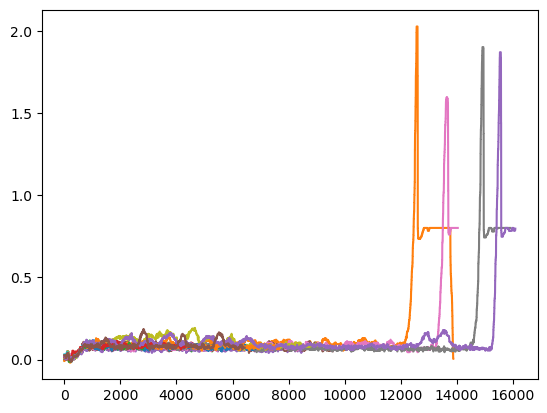

In [ ]:
lst_folder1_bad = []

# für jede der 100 Dateien, machen wir das 1x:
for i in range(1, 101):
    # wenn i Teil der Liste lst_dont_import ist, ist die Datei schlecht und soll importiert werden
    if i in lst_dont_import:
        # der Name der Datei setzt sich wie vorhin aus dem Ordner mypath, dem Namen und dem Index zusammen
        tmp_file = mypath + "ast11-graph (" + str(i) + ").csv"
        tmp_df = pd.read_csv(tmp_file, encoding = 'ISO-8859-1')

        # mit .values wird das DataFrame in eine Liste transformiert
        # und mit .append danach ans Ende der Liste gehängt
        lst_folder1_bad.append(tmp_df["Torque(N·m)"].values)

for i in range(0, len(lst_folder1_bad)):
    plt.plot(lst_folder1_bad[i])

print("Die Grafen sind tatsächlich unvollständig, also hat Tim einen guten Job gemacht")

### 1.4 Was passiert wenn neue Messungen dazukommen?
Falls in einem Ordner neue Messungen dazukommen, muss der Code erneut angepasst werden, damit die for-Schleife nicht nach 100 Durchläufen aufhört. Benutze eine Suchmaschine deiner Wahl, um die Packages os und os.path für dieses Problem anzuwenden.

In [ ]:
# Beispiel für Ordner 1:

from os import listdir
from os.path import isfile, join

mypath = "C:/FTP1_V06/Einführung/1/"  # Nochmal der Ordner (um sicher zu gehen)
lst_dont_import = [73, 77, 79, 14, 80, 70, 87, 82, 98, 6, 27, 92, 91, 81, 65, 97]

files = listdir(mypath)  # Liste von ALLEM in dem Ordner
only_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]  # Nur Dateien in dem Order (keine Ordner)
only_csv = [mypath + f for f in listdir(mypath) if f[-4:] == ".csv"]  # Nur csv-Dateien mit ganzem Pfad
print(only_csv)


# Abwandlung von vorigem Beispiel (achte auf die range von der Vor-Schleife)
# leere Liste, in der wir die zu importierenden Ordner speichern
lst_folder1 = []

# für jede der .csv-Dateien IN DEM ORDNER, machen wir das 1x:
for i in range(1, len(only_csv)):
    # wenn i NICHT Teil der Liste lst_dont_import ist, ist die Datei gut und kann importiert werden
    if i not in lst_dont_import:
        # der Name der Datei setzt sich wie vorhin aus dem Ordner mypath, dem Namen und dem Index zusammen
        tmp_file = mypath + "ast11-graph (" + str(i) + ").csv"
        tmp_df = pd.read_csv(tmp_file, encoding = 'ISO-8859-1')

        # mit .values wird das DataFrame in eine Liste transformiert
        # und mit .append danach ans Ende der Liste gehängt
        lst_folder1.append(tmp_df["Torque(N·m)"].values)


['C:/FTP1_V06/Einführung/1/ast11-graph (1).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (10).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (100).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (11).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (12).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (13).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (14).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (15).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (16).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (17).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (18).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (19).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (2).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (20).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (21).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (22).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (23).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (24).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (25).csv', 'C:/FTP1_V06/Einführung/1/ast11-graph (26).csv', 'C:/FTP1_V06/Einführ

In [ ]:
# Falls wir keine Fehlerhaften Dateien hätten, könnten wir so auch alle Dateien in einer Zeile importieren:
lst_csv = [pd.read_csv(f, encoding = 'ISO-8859-1')["Torque(N·m)"].values for f in only_csv]


# 2. Datenaufbereitung

## Einleitung
Machine Learning Algorithmen sind bezüglich der Qualität der Daten sehr sensibel. Manche Datenaufbereitungsschritte sind notwendig, um die Funktionalität der Algorithmen zu gewährleisten, während andere Schritte die Qualität der Modelle deutlich verbessern können.
In diesem Kapitel werden übliche Datenaufbereitungsschritte erklärt und implementiert.

### Padding
Wie du im vorherigen Kapitel gesehen hast, sind die Zeitreihen unterschiedlich lang (siehe die Grafik mit allen Zeitreihen auf einmal). Machine Learning Algorithmen benötigen aber immer gleich große Eingangsgrößen. Deshalb gibt es den Prozess des Paddings, bei dem die Zeitreihen auf eine länge gezogen werden.

Der fleißige Student Tim hat herausgefunden, dass die längste Zeitreihe 18098 Datensätze enthält. Jetzt wollen wir alle anderen Zeitreihen auf diese Länge bringen.

In [ ]:
### Diesen Teil lösen wir gemeinsam

# Padding:

# Erstmal das lst_folder umbenennen, das werden später unsere Eingangsgrößen, deshalb x
x = lst_folder

max_len = 18098  # die maximale Länge, die Tim bestimmt hat
x_pad = []  # neue Liste, die die gepaddeten Zeitreihen speichert

for xi in x:  # gehe durch alle einzelnen Zeitreihen xi in der Liste der Zeitreihen x
    len_xi = len(xi) # Länge der aktuellen Zeitreihe
    n_to_pad = max_len - len_xi  # wie viele Daten müssen wir hinzufügen, um die gewünschte Länge zu erreichen

    first_val = xi[0]  # erster Wert der aktuellen Zeitreihe
    to_pad = np.repeat(first_val, n_to_pad).transpose()  # wiederhole den ersten Wert n_to_pad mal
    xi_padded = np.concatenate([to_pad, xi])  # Füge die erzeugte Reihe und die ursprüngliche Reihe zusammen
    x_pad.append(xi_padded)  # hänge den gepaddeten Wert an die neue Liste an

x_pad = np.stack(x_pad)  # wandle die Liste in ein numpy stack um (geht auch nur, wenn alle gleich lang sind)

print(x_pad.shape)  # gebe finale shape des gepaddeten arrays aus

(228, 18098)


### Scaling
Idealerweise sind die Daten für Machine Learning Algorithmen in einem ähnlichen Wertebereich. Wenn man zum Beispiel eine KI für die Klassifizierung von Kreditwürdigkeiten entwickelt, könnten interessante Parameter das Alter und das Vermögen sein. Das Alter wird in einem Bereich von 18-80 sein, während das Vermögen von ein paar hundert bis mehrere millionen Euro. Das kann das Training von Machine Learning Algorithmen negativ beeinflussen.

Deshalb werden scaling-Methoden verwendet, um alle Daten in einen ähnlichen Wertebereich zu transformieren. An dieser Stelle schauen wir uns das min-max-scaling an.

Beim min-max-scaling werden alle Werte in ein Intervall von [0, 1] projiziert. Dazu wird das Minimum von allen Werten abgezogen und jeder Wert anschließend durch die Differenz von Maximum und Minimum geteilt.


In [ ]:
### Diesen Teil lösen wir gemeinsam

def min_max_scaler(x):
    x -= x.min()  # minimum abziehen
    x /= x.ptp()  # ptp = peak to peak, also max - min
    return x

# Durchführen und Unterschied anschauen:
print("Pre scaling: ")
print(x_pad[0])
scaled_x = min_max_scaler(x_pad)
print("post scaling: ")
print(scaled_x[0])

Pre scaling: 
[0.03584 0.03584 0.03584 ... 0.      0.      0.     ]
post scaling: 
[0.0251938  0.0251938  0.0251938  ... 0.00968992 0.00968992 0.00968992]


### Datensplit

Bei Machine Learning Anwendungen ist es üblich, die Daten in Trainings-, Validierungs- und Test-Daten aufzuteilen:
- Anhand der Trainings-Daten "lernt" das ML-Modell die Zusammenhänge in den Daten
- Die Validierungsdaten werden im Trainingsvorgang zurückgehalten und die Performance des Modells bei den Validierungsdaten wird im Training aufgezeichnet.
- Die Testdaten werden komplett vom Training zurückgehalten und werden verwendet, um die Verallgemeinerungsfähigkeit des Modells zu beobachten

Typischerweise werden die Datensets so aufgeteilt, dass 80% der Daten Trainings- und Validierungsdaten sind und 20% Testdaten.

Wir implementieren jetzt eine Funktion selbst, die x und y in zwei Teile aufteilt:

In [ ]:
### Diesen Teil lösen wir gemeinsam

def tt_split(x, y, test_size):
    total_len = len(x)  # Gesamtlänge
    ind = np.arange(total_len)  # Liste der Indices von x und y
    n_test = int(total_len * test_size)  # gerundete anzahl von Daten, die noch im Test-set sein sollen
    ind_test = np.random.choice(a = ind, size = n_test, replace = False)  # wähle zufällige indices aus
    ind = np.delete(ind, ind_test)  # lösche die ausgewählten indices aus ind
    return x[ind], x[ind_test], y[ind], y[ind_test]  # gib x_train, x_test, y_train und y_test aus

print("Original length: " + str(len(x)))
x_train, x_test, y_train, y_test = tt_split(x, y, 0.2)
print("Train length: " + str(len(x_train)))
print("Test length: " + str(len(x_test)))





Original length: 228
Train length: 183
Test length: 45


## Bonusaufgaben

### Bonusaufgaben 2.1: Padding
#### Bonusaufgabe 2.1.1: Was passiert wenn neue Daten hinzukommen?
Wenn neue Messungen vorgenommen werden kann sich die maximale Länge der Zeitreihen ändern. Dann müsste der fleißige Student Tim wieder alle Datensätze durchschauen und den Parameter max_len manuell ändern.
        
Finde einen Weg die maximale Länge automatisch zu bestimmen. Schreibe dann eine eigene Funktion padding(), die eine Liste aus weiteren Listen x übergeben bekommt und alle Arrays in x auf dieselbe Länge bringt und anschließend ausgibt.

In [ ]:
def padding(x):

    len_seq = [len(i) for i in x]  # Liste mit der Länge von allen Sequenzen
    max_len = max(len_seq)  # bestimme die maximale Länge

    x_new = np.zeros((len(x), max_len))  # erzeuge leeres array mit Ziel-Dimensionen
    """NOTIZ:
        Wenn wir von Anfang an wissen wie groß das neue Array wird (wie in diesem Fall),
        macht es aus Computersicht sehr viel Sinn das Array mit dieser Größe zu initialisieren
        und anschließend jedem Index den neuen Wert zuzuordnen, anstatt jedes mal die neuen Werte anzuhängen.

        Was für uns rein logisch keinen Unterschied macht, ist für Computer ein enormer Unterschied.
        Als Analogie kann man sich einen Restaurantbetrieb vorstellen.
        Wenn ein Restaurant an jedem Abend wüsste, wie viele Gäste wann kommen und was sie bestellen,
        könnte schon das komplette Geschirr gedeckt sein, bevor die Gäste kommen.
        Wenn der Gast dann kommt werden seine Teller nur noch befüllt und er kann essen.

        Ohne die Information muss das Geschirr immer erst rausgeholt werden und an den Platz gebracht werden,
        was viel Zeit kostet.

        So ähnlich funktioniert das auch bei Computerressourcen.
        Wenn von Anfang an der Speicherplatz definiert ist und dann nur noch mit Informationen befüllt wird,
        geht der Vorgang viel schneller.
        In diesem einfachen Beispiel fällt das nicht so sehr auf, aber wenn man die Funktion öfter durchführen muss
        oder das Datenset größer wird, wird der Unterschied schnell sehr deutlich."""

    for i in range(0, len(x)):
        n_to_pad = max_len - len_seq[i]
        to_pad = np.repeat(x[i][0], n_to_pad).transpose()  # wiederhole den ersten Wert n_to_pad mal
        x_new[i, :] = np.concatenate([to_pad, x[i]])  # speichere gepaddete sequenz in x_new

    return x_new

x = lst_folder
x_new = padding(x)
print(x_new.shape)

(228, 18098)


#### Bonusaufgabe 2.1.2: Müssen wir das wirklich alles selbst machen?
Benutze eine Suchmaschine deiner Wahl um dir die Funktion numpy.pad() anzuschauen und implementiere eine weitere Funktion padding2() damit.

In [ ]:
def padding2(x):
    len_seq = [len(i) for i in x]  # Liste mit der Länge von allen Sequenzen
    max_len = max(len_seq)  # bestimme die maximale Länge

    x_new = [np.pad(array = xi, pad_width = (max_len - len(xi), 0), mode = 'constant', constant_values = (xi[0], )) for xi in x]
    x_new = np.array(x_new)
    return x_new

x = lst_folder
x_new = padding2(x)
print(x_new.shape)

(228, 18098)


#### Bonusaufgabe 2.1.3: Was ist besser, unser Ansatz oder die numpy Funktion?
Nutze die Funktion datetime.datetime.now() um zu beobachten, welche der beiden padding Funktionen schneller ist.

In [ ]:
x = lst_folder

# Unsere Funktion
start1 = datetime.now()
x_pad = padding(x)
end1 = datetime.now() - start1
print("Time taken for padding1:")
print(end1)

# Die vorimplementierte Funktion
start2 = datetime.now()
x_pad2 = padding2(x)
end2 = datetime.now() - start2
print("Time taken for padding2:")
print(end2)

# Nochmal direkter automatischer vergleich
if end1 < end2:
    print("Our padding function was faster")
else:
    print("The official numpy version was faster")

Time taken for padding1:
0:00:00.021045
Time taken for padding2:
0:00:00.040963
Our padding function was faster


### Bonusaufgaben 2.2: Scaling
#### Bonusaufgabe 2.2.1: z-Score Normalisierung
Neben dem min-max-scaling gibt es zum Beispiel noch die z-Score Normalisierung. Dabei werden alle Werte in ein Intervall von [-1; 1] projiziert. Das funktioniert, indem von allen Werten der Mittelwert abgezogen und anschließend  durch die Standardabweichung geteilt wird. Implementiere die Funktion zscore(x).

In [ ]:
def zscore(x):
    x -= x.mean()
    x /= x.std()
    return x

print(x_pad[0])
x_z = zscore(x_pad)
print(x_z[0])

[0.03584 0.03584 0.03584 ... 0.      0.      0.     ]
[-0.43656581 -0.43656581 -0.43656581 ... -0.59312832 -0.59312832
 -0.59312832]


#### Bonusaufgabe 2.2.2: Müssen wir das wirklich alles selbst machen? - 2.0
Im package scikitlearn gibt es die beiden vorgefertigten Funktionen MinMaxScaler und StandardScaler. Verwende die beiden Funktionen als Alternative, um die Scaling Methoden durchzuführen.

In [ ]:
print(x_pad[0])
print("Min Max Scaling:")
mc = MinMaxScaler()
x_mms = mc.fit_transform(x_pad)
print(x_mms[0])

print("Z-Score normalisation:")
sc = StandardScaler()
x_ss = sc.fit_transform(x_pad)
print(x_ss[0])

[-0.43656581 -0.43656581 -0.43656581 ... -0.59312832 -0.59312832
 -0.59312832]
Min Max Scaling:
[0.8 0.8 0.8 ... 0.  0.  0. ]
Z-Score normalisation:
[1.74462794 1.74462794 1.74462794 ... 0.         0.         0.        ]


#### Bonusaufgabe 2.2.3: Rennen gegen die Zeit
Nutze die Funktion datetime.datetime.now() um zu beobachten, welche der Scaling-Funktionen schneller ist.

In [ ]:
start_mms1 = datetime.now()
x_mms1 = min_max_scaler(x_pad)
end_mms1 = datetime.now() - start_mms1
print("Eigener Min Max Scaler:")
print(end_mms1)

start_mms2 = datetime.now()
mc = MinMaxScaler()
x_mms2 = mc.fit(x_pad)
end_mms2 = datetime.now() - start_mms2
print("Sklearn Min Max Scaler:")
print(end_mms2)

start_ss1 = datetime.now()
x_ss1 = zscore(x_pad)
end_ss1 = datetime.now() - start_ss1
print("Eigener z-score Scaler:")
print(end_mms1)

start_ss2 = datetime.now()
mc = StandardScaler()
x_ss2 = mc.fit(x_pad)
end_ss2 = datetime.now() - start_ss2
print("Sklearn z-score Scaler:")
print(end_mms2)

Eigener Min Max Scaler:
0:00:00.018992
Sklearn Min Max Scaler:
0:00:00.013007
Eigener z-score Scaler:
0:00:00.018992
Sklearn z-score Scaler:
0:00:00.013007


In [ ]:
""" Für das Training von CNN müssen wir die Form noch anpassen."""
x = padding2(x)
x = x.reshape((228,18098,1))
print(x.shape)
print(y.shape)

(228, 18098, 1)
(228, 5)


### 2.3 Train-Test-Split
#### 2.3.1 Müssen wir das wirklich alles selbst machen? - 3.0
Schaue dir die Funktion train_test_split von sklear.preprocessing an und wende sie an.
Wenn du hochmotiviert bist, kannst du wieder stoppen was schneller geht. #LaufzeitIsLife

In [ ]:
start1 = datetime.now()
x_train, x_test, y_train, y_test = tt_split(x, y, 0.2)
print("Our function took:")
print(datetime.now() - start1)

start2 = datetime.now()
x_train2, x_test2, y_train2, y_train2 = train_test_split(x, y, test_size=0.2)
print("Sklearn function took:")
print(datetime.now() - start2)

Our function took:
0:00:00.009002
Sklearn function took:
0:00:00.012011


# Erstellung eines Convolutional Neural Networks

## Convolutional Neural Network, batch_size=32, padding first value
Wir modellieren ein einfaches Convolutional Neural Network (CNN). CNN sind bekannt und State of the Art in der Bildverarbeitung und Objekterkennung, zeigen aber auch bei Zeitreihen und sequentiellen Daten sehr gute Ergebnisse. Bei CNNs werden die Daten gefaltet und durch verschiedene Filter werden Merkmale erlernt. Eine Merkmalsdefinition vor dem Modell kann dadurch entfallen. Zwischen einzelnen faltenden Schichten, den sog. Convolutional Layern, werden häufig Pooling Layer (meist MaxPooling) eingesetzt, um die Datenmenge weiter zu reduzieren und zudem eine robustere Analyse zu ermöglichen. Im Anschluss an die Convolutional Layer folgt der eigentliche KLassifizierungsalgorithmus, zumeist in Form eines vollvernetzten neuronalen Netzes.

Diese Aufgabe lösen wir gemeinsam.

In [ ]:
def import_data_screw_fastening():
     # reading time sequences, adding values to list, evaluating length of time sequences
    path = "C:/FTP1_V06/Einführung/"
    path2 = "ast11-graph "

    sequences = list()
    list_incomplete = [73, 77, 79, 14, 80, 70, 87, 82, 98, 6, 27, 92, 91, 81, 65, 97]

    for i in range(1,101): # OK processes + missing shim processes
        if i in list_incomplete: continue
        file_path = path + "1/" + path2 + "(" + str(i) + ")" + ".csv"
        df = pd.read_csv(file_path, encoding = 'ISO-8859-1')
        df1 = df["Torque(N·m)"]
        values = df1.values
        sequences.append(values)

    for i in range(1,101): # Obstacle in thread hole + damaged screw thread
        file_path = path + "2/" + path2 + "(" + str(i) + ")" + ".csv"
        df = pd.read_csv(file_path, encoding = 'ISO-8859-1')
        df1 = df["Torque(N·m)"]
        values = df1.values
        sequences.append(values)

    list_incomplete = [19, 3, 15, 18, 12, 33]
    for i in range(1,51): # Chip underneath shim
        if i in list_incomplete: continue
        file_path = path + "3/" + path2 + "(" + str(i) + ")" + ".csv"
        df = pd.read_csv(file_path, encoding = 'ISO-8859-1')
        df1 = df["Torque(N·m)"]
        values = df1.values
        sequences.append(values)

    # analyse sequence lengths
    len_sequences = []
    for seq in sequences:
        len_sequences.append(len(seq))
    pd.Series(len_sequences).describe()

    # padding time sequences to maximum length by repeating first value
    maxlen = 18098
    new_seq = []
    for one_seq in sequences:
        len_one_seq = len(one_seq)
        first_val = one_seq[0]
        n = maxlen - len_one_seq

        to_concat = np.repeat(first_val, n).transpose()
        new_one_seq = np.concatenate([to_concat, one_seq])
        new_seq.append(new_one_seq)
    final_seq = np.stack(new_seq)

    print(final_seq.shape)
    print(final_seq[0].shape)
    print(final_seq[0])

    # assigning labels
    targets = pd.read_csv(path + "Classes.csv")
    targets = targets.values[:]
    targets = to_categorical(targets, num_classes=5)
    print(targets.shape)

    # MinMaxScaler and train test split

    mc = MinMaxScaler()
    final_seq_mc = mc.fit_transform(final_seq)
    final_seq_mc = final_seq_mc.reshape((228,18098,1))

    return final_seq_mc, targets

In [ ]:
### Diesen Teil lösen wir gemeinsam

x, y = import_data_screw_fastening()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# create CNN model
model = Sequential()
model.add(Conv1D(32, 7, activation='relu', input_shape=(18098,1)))
model.add(MaxPooling1D(3))
model.add(Conv1D(64, 7, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

adam = keras.optimizers.Adam()

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.summary()

# nach model.summary() die Studenten ausführen lassen, damit man das Summary anschauen kann. Dann erstmal mit 10 epochen ausführen

# fit model on training data and evaluate model on test data
history = model.fit(x_train, y_train, validation_split=0.15, batch_size=128, epochs=50)
score = model.evaluate(x_test, y_test, batch_size=32)
print("Test-%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

(228, 18098)
(18098,)
[0.03584 0.03584 0.03584 ... 0.      0.      0.     ]
(228, 5)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18092, 32)         256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6030, 32)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 6024, 64)          14400     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2008, 64)         0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 128512)            0         
                                     

2/2 [==============================] - 2s 464ms/step - loss: 0.2522 - accuracy: 0.9026 - val_loss: 0.2502 - val_accuracy: 0.8929
Epoch 47/50
2/2 [==============================] - 2s 458ms/step - loss: 0.2029 - accuracy: 0.9416 - val_loss: 0.2590 - val_accuracy: 0.8929
Epoch 48/50
2/2 [==============================] - 2s 452ms/step - loss: 0.2461 - accuracy: 0.9091 - val_loss: 0.2319 - val_accuracy: 0.8929
Epoch 49/50
2/2 [==============================] - 2s 480ms/step - loss: 0.2580 - accuracy: 0.8896 - val_loss: 0.2220 - val_accuracy: 0.8929
Epoch 50/50
2/2 [==============================] - 0s 47ms/step - loss: 0.2041 - accuracy: 0.9130
Test-accuracy: 91.30%


In [ ]:
### Diesen Teil lösen wir gemeinsam

print("Prediction time on test set: ")
y_pred = model.predict(x_test, verbose=1)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion matrix: ")
print(matrix)

Prediction time on test set: 
2/2 [==============================] - 0s 53ms/step
Confusion matrix: 
[[ 7  1  0  0  0]
 [ 0  3  0  0  1]
 [ 0  0 13  0  0]
 [ 0  0  0 11  0]
 [ 0  2  0  0  8]]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


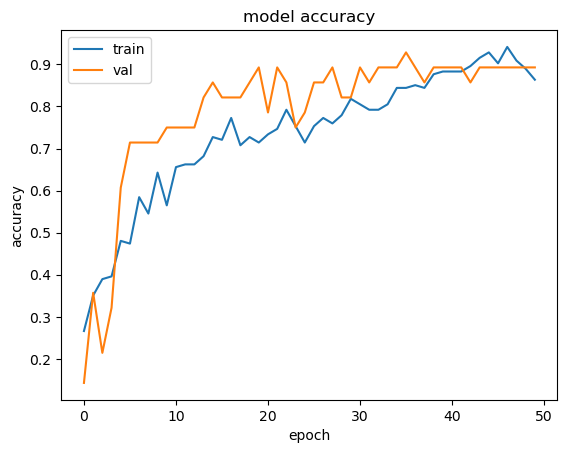

In [ ]:
### Diesen Teil lösen wir gemeinsam

# list all data in history
print(history.history.keys())
# summarize and print history for accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

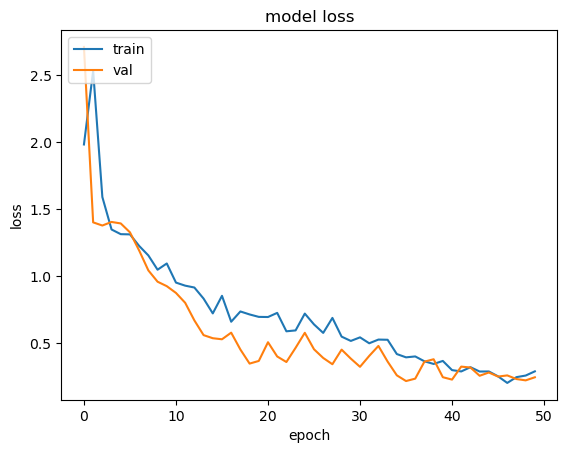

In [ ]:
### Diesen Teil lösen wir gemeinsam

# summarize and print history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# save model to h5-file
#model.save("c://Desktop/Conv_ftp.h5")